In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Ping-pong

In [9]:
!mpic++ PingPong_part2.cpp -o test

In [10]:
!mpirun -n 6 ./test 100000

40000000
0.00355734


First line is message size

Second line is measured time

In [15]:
times = {}
for i in range(3, 10):
    y = []
    for _ in range(5):
        time = !mpirun -n 6 ./test {10**i}
        x = int(time[0])
        y.append(float(time[1]))
    times[x] = sum(y) / len(y)
times

{400000: 0.00042810039999999997,
 4000000: 0.0008764816,
 40000000: 0.0035571640000000002,
 400000000: 0.0368114,
 4000000000: 0.398238,
 40000000000: 4.005276,
 400000000000: 41.96048}

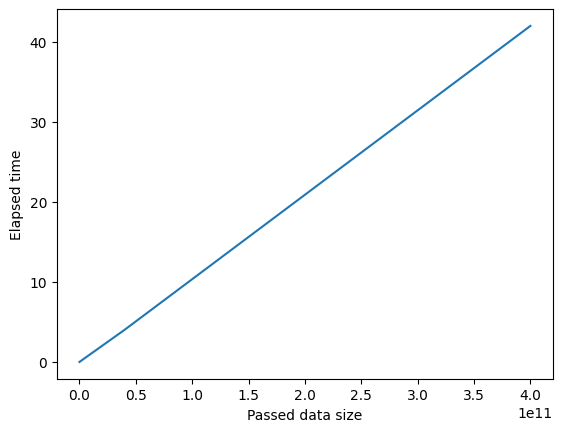

In [24]:
plt.xlabel("Passed data size")
plt.ylabel("Elapsed time")
plt.plot(times.keys(), times.values())
plt.show()

## Cellular automaton

In [17]:
!mpic++ Automaton.cpp -o test
!mpirun -n 6 ./test

0.241800


In [20]:
times = {}
for i in range(1, 6):
    arr = []
    for _ in range(10):
        time = !mpirun -n {i} ./test
        arr.append(float(time[0]))
    times[i] = sum(arr)/len(arr)

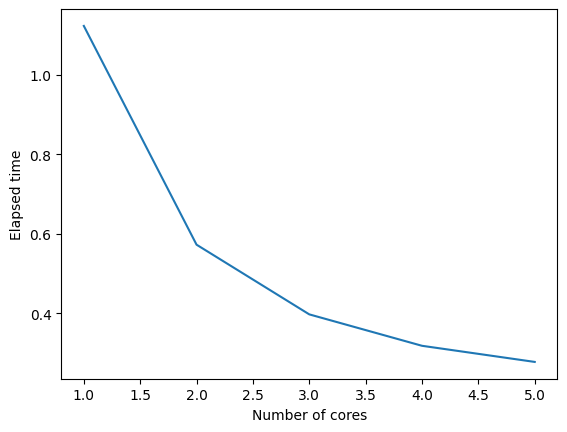

In [22]:
plt.xlabel("Number of cores")
plt.ylabel("Elapsed time")
plt.plot(times.keys(), times.values())
plt.show()